Chest X Ray model to Cardiomegaly. 

In [55]:
#Essential libraries for data visualization and Deep learning
import os
import cv2
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import Model, layers

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.regularizers import l2

In [56]:
DIR = '/Users/neeharikasinha/Documents/datascience-course/CXR/'
SIZE = 64
TARGET_SIZE = (SIZE, SIZE)

The image augmentaion process and split the data in validation and train test from the list provided in the NIH
website.

In [57]:

train_datagen = ImageDataGenerator( 
    zoom_range=0.2,
    rotation_range=10,
    horizontal_flip=False,
    rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    DIR + '/train',
    batch_size=100,
    class_mode='categorical',
    target_size=TARGET_SIZE)
 
val_datagen = ImageDataGenerator(
    zoom_range=0.2,
    rotation_range=10,
    horizontal_flip=False,
    rescale=1.0/255)
 
val_generator = val_datagen.flow_from_directory(
    DIR + '/val',
    batch_size=100,
    class_mode='categorical',
    target_size=TARGET_SIZE)

test_datagen = ImageDataGenerator(
    zoom_range=0.2,
    rotation_range=10,
    horizontal_flip=False,
    rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    DIR + '/test',
    batch_size=100,
    class_mode='categorical',
    target_size=TARGET_SIZE)

Found 47047 images belonging to 2 classes.
Found 5160 images belonging to 2 classes.
Found 10930 images belonging to 2 classes.


In [58]:
train_generator.class_indices

{'cardiomegaly': 0, 'normal': 1}

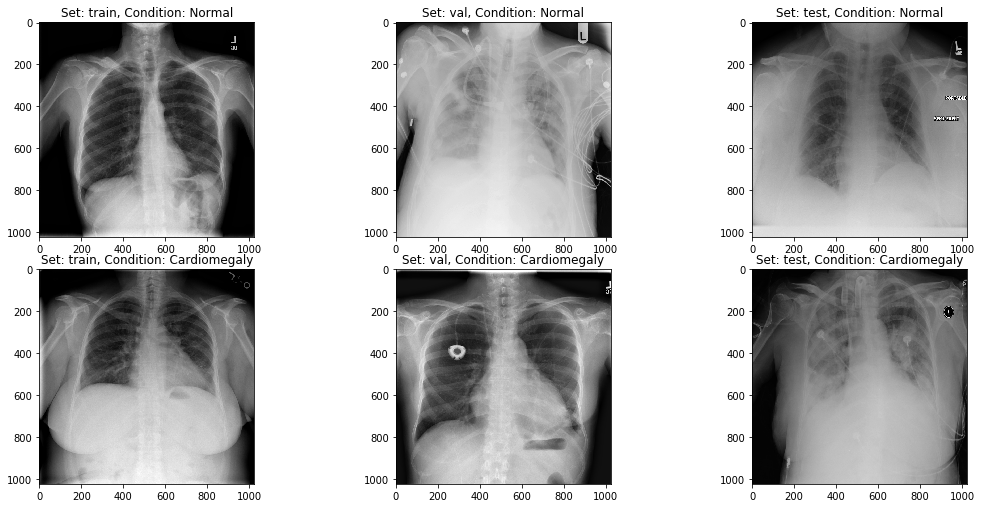

In [6]:
# code to print the images and see if there are any specific visual analysis. 
input_path = '/Users/neeharikasinha/Documents/datascience-course/CXR/'

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/normal/'+os.listdir(set_path+'/normal')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/cardiomegaly/'+os.listdir(set_path+'/cardiomegaly')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: Cardiomegaly'.format(_set))

Applied model including CNN 

In [7]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(SIZE, SIZE, 3), name="conv1"))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name="conv2"))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', name="conv3"))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', name="conv4"))
model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', name="conv5"))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', name="conv6"))
model.add(Dropout(0.25))
model.add(Conv2D(8, kernel_size=(5, 5), activation='relu', name="conv7"))
model.add(Conv2D(8, kernel_size=(5, 5), activation='relu', name="conv8"))
model.add(Dropout(0.25))
model.add(Conv2D(4, kernel_size=(7, 7), activation='relu', name="conv9"))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
model.add(Dense(2, activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2 (Conv2D)               (None, 60, 60, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 64)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 58, 58, 32)        18464     
_________________________________________________________________
conv4 (Conv2D)               (None, 56, 56, 32)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 56, 56, 32)        0         
_________________________________________________________________
conv5 (Conv2D)               (None, 52, 52, 16)       

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.000035),
              metrics=['accuracy'])

In [10]:
class_weight = {0: 3, 1: 1}

In [11]:
history = model.fit_generator(generator=train_generator,steps_per_epoch=53, epochs=70, validation_data=val_generator, validation_steps=6, use_multiprocessing=True, class_weight=class_weight) 



Epoch 1/70
53/53 [==============================] - 158s 3s/step - loss: 1.9976 - accuracy: 0.9613 - val_loss: 1.7785 - val_accuracy: 0.9633
Epoch 2/70
53/53 [==============================] - 147s 3s/step - loss: 1.7982 - accuracy: 0.9700 - val_loss: 1.6067 - val_accuracy: 0.9633
Epoch 3/70
53/53 [==============================] - 166s 3s/step - loss: 1.6974 - accuracy: 0.9664 - val_loss: 1.5536 - val_accuracy: 0.9650
Epoch 4/70
53/53 [==============================] - 161s 3s/step - loss: 1.5723 - accuracy: 0.9666 - val_loss: 1.3755 - val_accuracy: 0.9650
Epoch 5/70
53/53 [==============================] - 157s 3s/step - loss: 1.4549 - accuracy: 0.9679 - val_loss: 1.3693 - val_accuracy: 0.9617
Epoch 6/70
53/53 [==============================] - 153s 3s/step - loss: 1.3636 - accuracy: 0.9682 - val_loss: 1.2607 - val_accuracy: 0.9667
Epoch 7/70
53/53 [==============================] - 145s 3s/step - loss: 1.2999 - accuracy: 0.9657 - val_loss: 1.0743 - val_accuracy: 0.9600
Epoch 8/70
53

Epoch 59/70
53/53 [==============================] - 138s 3s/step - loss: 0.4234 - accuracy: 0.9638 - val_loss: 0.4186 - val_accuracy: 0.9350
Epoch 60/70
53/53 [==============================] - 138s 3s/step - loss: 0.4028 - accuracy: 0.9670 - val_loss: 0.3363 - val_accuracy: 0.9483
Epoch 61/70
53/53 [==============================] - 140s 3s/step - loss: 0.3881 - accuracy: 0.9698 - val_loss: 0.3689 - val_accuracy: 0.9500
Epoch 62/70
53/53 [==============================] - 135s 3s/step - loss: 0.4083 - accuracy: 0.9644 - val_loss: 0.2549 - val_accuracy: 0.9567
Epoch 63/70
53/53 [==============================] - 140s 3s/step - loss: 0.4100 - accuracy: 0.9670 - val_loss: 0.2860 - val_accuracy: 0.9600
Epoch 64/70
53/53 [==============================] - 140s 3s/step - loss: 0.3949 - accuracy: 0.9687 - val_loss: 0.2669 - val_accuracy: 0.9733
Epoch 65/70
53/53 [==============================] - 140s 3s/step - loss: 0.3896 - accuracy: 0.9670 - val_loss: 0.3186 - val_accuracy: 0.9483
Epoch 

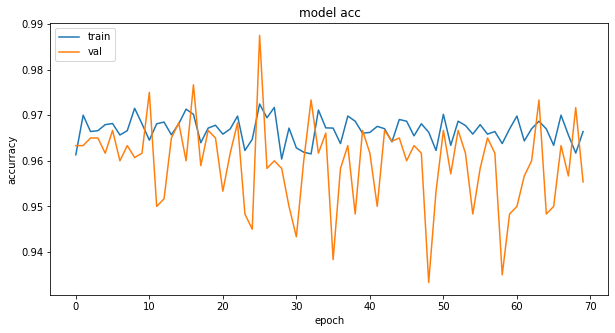

In [12]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accurracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

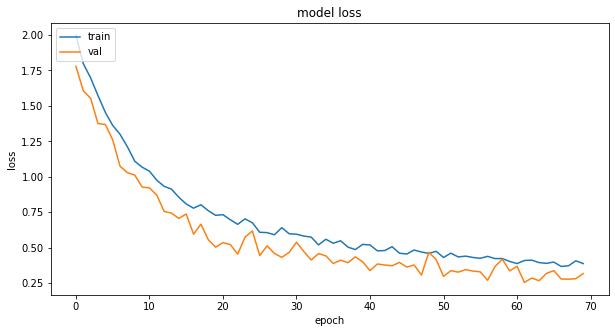

In [13]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
score = model.evaluate_generator(val_generator, steps=6, verbose=0)
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

Test loss: 28.49293053150177
Test accuracy: 95.333331823349


The model is able to achieve an accuracy of 97.67% which is quite good considering the size of data that is used

In [21]:
model.save('CXR_model')

In [23]:
# serialize model to JSON
model_json = model.to_json()
with open("Cardiomegalycalssification.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Cardiomegalycalssification.h5")
print("Saved model to disk")

Saved model to disk


In [69]:
test_imgs, test_labels =next(test_generator)

In [77]:
predictions= model.predict_generator(test_generator).ravel()

In [78]:
y_pred=predictions[:,0]

IndexError: too many indices for array

In [ ]:
type(test_labels)

In [ ]:
from sklearn.metrics import roc_curve
#y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_labels, y_pred)